# Supplemental Figures

Kexin Dong, Samuel Gould

Last Update: Jan 23, 2025

In [6]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42   
mpl.rcParams['ps.fonttype'] = 42 
mpl.rcParams['text.usetex'] = False 
import bioh2m as h2m
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import requests
import time
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects
import seaborn as sns
from sklearn.decomposition import PCA
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Helvetica']

## Focused Screen Quality Control

### a

In [10]:
ABE_BC_COUNTS = pd.read_csv('counts/focused/FC_ABE_BC_COUNTS.txt', sep='\t')
ABE_EPO_COUNTS = pd.read_csv('counts/focused/FC_ABE_EPO_COUNTS.txt', sep='\t')

# CBE_BC_COUNTS = pd.read_csv('counts/focused/FC_CBE_BC_COUNTS.txt', sep='\t')
# CBE_EPO_COUNTS = pd.read_csv('counts/focused/FC_CBE_EPO_COUNTS.txt', sep='\t')

In [12]:
ABE_BC_COUNTS = ABE_BC_COUNTS[ABE_BC_COUNTS.columns[2:]]
ABE_EPO_COUNTS = ABE_EPO_COUNTS[ABE_EPO_COUNTS.columns[2:]]
# CBE_EPO_COUNTS = CBE_EPO_COUNTS[CBE_EPO_COUNTS.columns[2:]]
# CBE_BC_COUNTS = CBE_BC_COUNTS[CBE_BC_COUNTS.columns[2:]]

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


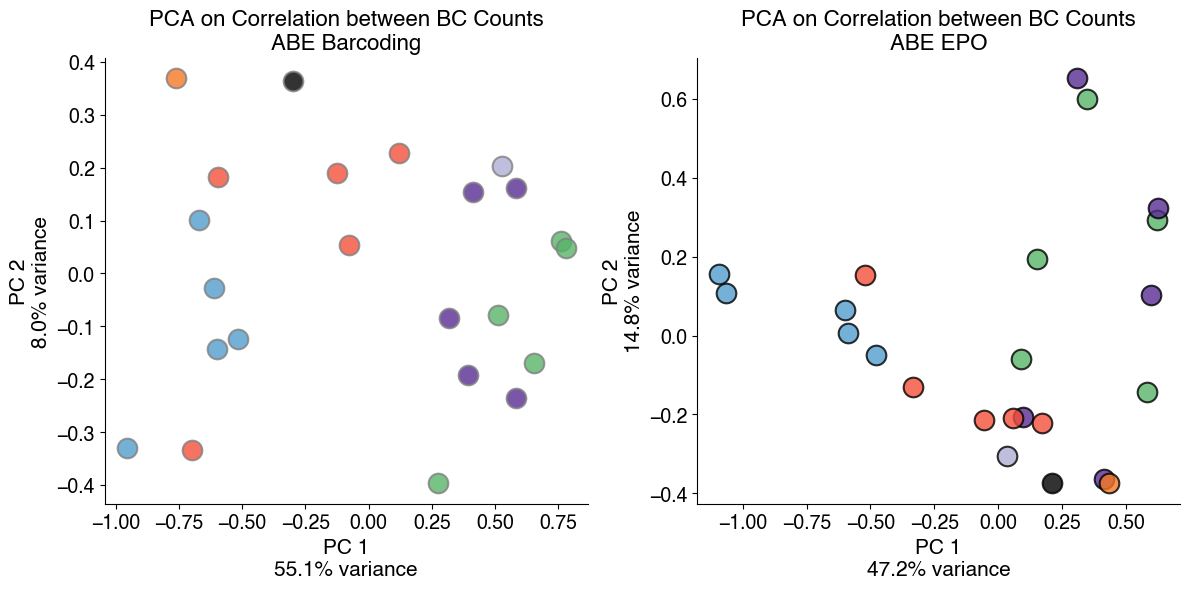

In [19]:
def pca_scatter(data, ax, title, palette, edgecolors):
    """
    data: dataframe to compute correlation and PCA
    ax: subplot axis
    title: subplot title
    palette: list of colors for each point
    """

    # PCA on correlation matrix
    pca = PCA(n_components=2)
    Xt = pca.fit_transform(data.corr(method='spearman'))

    # scatter points
    for i in range(len(Xt)):
        ax.scatter(
            Xt[i][0], Xt[i][1],
            edgecolor=edgecolors,
            linewidths=1.5,
            s=200,
            alpha=.8,
            c=palette[i]
        )

    # explained variance
    var = pca.explained_variance_ratio_

    ax.set_xlabel(f'PC 1\n{np.round(var[0]*100, 1)}% variance', fontsize=15)
    ax.set_ylabel(f'PC 2\n{np.round(var[1]*100, 1)}% variance', fontsize=15)

    ax.spines[['top', 'right']].set_visible(False)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.set_title(title, fontsize=16)

yellows = sns.color_palette('Oranges').as_hex()
blues   = sns.color_palette('Blues').as_hex()
greens  = sns.color_palette('Greens').as_hex()
reds    = sns.color_palette('Reds').as_hex()
purples = sns.color_palette('Purples').as_hex()

palette = [
    greens[3], greens[3], greens[3], greens[3], greens[3],   # bone marrow
    purples[5], purples[5], purples[5], purples[5], purples[5], # d15
    purples[2],             # d5
    yellows[3],             # input
    'black',                # plasmid
    reds[3], reds[3], reds[3], reds[3], reds[3],   # men
    blues[3], blues[3], blues[3], blues[3], blues[3] # spleen
]

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=False, sharey=False)
pca_scatter(ABE_BC_COUNTS,  axes[0], "PCA on Correlation between BC Counts\nABE Barcoding", palette, edgecolors="gray"  )
pca_scatter(ABE_EPO_COUNTS, axes[1], "PCA on Correlation between BC Counts\nABE EPO",      palette, edgecolors="black")

fig.tight_layout()
fig.savefig('figures/pca_focused_abe.pdf')
plt.show()

### b

In [ ]:
palette_1 = [
    greens[3], greens[3], greens[3],   # bone marrow
    purples[5], purples[5], purples[5], purples[5], purples[5], # d15
    purples[2], purples[2],purples[2],purples[2],purples[2], # d5
    yellows[3], yellows[3], yellows[3], yellows[3], yellows[3], # input
    'black',                # plasmid
    reds[3], reds[3], reds[3],  # men
    blues[3], blues[3], blues[3], # spleen
]
palette_2 = [
    greens[3], greens[3], greens[3], greens[3],greens[3],  # bone marrow
    purples[5], purples[5], purples[5], purples[5], purples[5], # d15
    purples[2], purples[2],purples[2],purples[2],purples[2], # d5
    yellows[3], yellows[3], yellows[3], yellows[3], yellows[3], # input
    'black',                # plasmid
    reds[3], reds[3], reds[3],reds[3], reds[3], # men
    blues[3], blues[3], blues[3], blues[3], blues[3],# spleen
]

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=False, sharey=False)

# pca_scatter(CBE_BC_COUNTS,  axes[0], "PCA on Correlation of BC Counts\nCBE barcoding screen", palette_1)
# pca_scatter(CBE_EPO_COUNTS, axes[1], "PCA on Correlation of BC Counts\nCBE EPO screen",      palette_2)
fig.tight_layout()
fig.savefig('figures/pca_focused_cbe.pdf')

plt.show()